## Part-1

In [3]:
#Importing the necessary libraries
import numpy as np 
import pandas as pd 

from sklearn import model_selection,metrics
import matplotlib.pyplot as plt

import os
import gzip 

In [2]:
#Loading the required datasets
blobs_dataset=pd.read_csv('blobs400.csv')
circles_dataset=pd.read_csv('circles500.csv')

#Shuffling the dataset points to induce randomness
blobs_dataset=blobs_dataset.sample(frac=1)
blobs_dataset.head()

,X1,X2,X3,Class
287,1.503992,3.917754,0.773494,0
164,1.662366,2.740582,0.385948,0
71,1.417308,1.468232,1.138048,1
202,2.562896,3.384541,-1.703815,0
167,1.387191,3.775782,-0.207077,0


In [3]:
#Shuffling the dataset points to induce randomness
circles_dataset=circles_dataset.sample(frac=1)
circles_dataset.head()

,X0,X1,Class
132,0.089128,-0.444674,1
326,-0.034517,-0.382513,1
263,0.456995,-0.251064,1
27,-0.363988,0.293119,1
402,-0.428859,0.280335,1


In [4]:
blobs_dataset.describe()

,X1,X2,X3,Class
count,400.000000,400.000000,400.000000,400.000000
mean,1.815629,2.160262,0.272859,0.500000
std,0.739431,1.587752,0.743674,0.500626
min,-0.191093,-1.155074,-1.947202,0.000000
25%,1.339119,0.721100,-0.207203,0.000000
50%,1.789645,2.123041,0.314356,0.500000
75%,2.335352,3.570711,0.785715,1.000000
max,4.206710,5.316181,2.771594,1.000000


In [5]:
circles_dataset.describe()

,X0,X1,Class
count,500.000000,500.000000,500.000000
mean,0.001883,0.001360,0.500000
std,0.560800,0.565572,0.500501
min,-1.098804,-1.236740,0.000000
25%,-0.422585,-0.422241,0.000000
50%,-0.010330,-0.006789,0.500000
75%,0.436874,0.448787,1.000000
max,1.142574,1.123521,1.000000


### Splitting the Dataset
Splitting the blobs and circle dataset into train, test (hold out), and validation datasets.This was done with the sklearn's train_test split library
The dataset was initially split into temporary set, and the hold out set. Then this temporary set was further split into the training and the validation datasets.

In [6]:
#Segregating the independent and dependent variables.
blobs_X,blobs_y,circles_X,circles_y=blobs_dataset.iloc[:,:-1],blobs_dataset.iloc[:,-1],circles_dataset.iloc[:,:-1],circles_dataset.iloc[:,-1]
blobs_X_temp,blobs_X_test,blobs_y_temp,blobs_y_test=model_selection.train_test_split(blobs_X,blobs_y,test_size=0.15)
blobs_X_train,blobs_X_val,blobs_y_train,blobs_y_val=model_selection.train_test_split(blobs_X_temp,blobs_y_temp,test_size=0.15)
circles_X_temp,circles_X_test,circles_y_temp,circles_y_test=model_selection.train_test_split(circles_X,circles_y,test_size=0.15)
circles_X_train,circles_X_val,circles_y_train,circles_y_val=model_selection.train_test_split(circles_X_temp,circles_y_temp,test_size=0.15)

### Logistic Regression (Single Node Neural Network)
Logistic Regression is a probablistic classifier where for a given set of input we get a value which lies between 0 and 1 and defined confidence of the particular data point of more than one feature to have the label as positive. In real life the threshold that labels the point as positive or negative can vary based on the application. 
The logistic regression is an algorithm where the end result can be expressed as <br>
$$y_hat= f(w*X+b)$$ 
The f() represents the sigmoid function where the corresponding value is represented on the scale of 0 and 1.
The values of w and b iteratively change over the iterations based on the cost function computed for the step. The cost function is the aggregation of loss for that iteration which is computed with the log likelihood loss function. The end goal is to find the pair or weight and bias which can linearly classify a set of points and this pair is found by iteratively finding way to minimise the loss function.<br>
$$Loss= -\sum_{i=1}^N{(yi log(y_hat) + (1 - yi)\log(1 - y_hat))}$$

The steps associated are as follows: <br>
- Step:1: Initialize a random pair of weight and biases which have the mean as 0 and standard deviation as 0.01. Along with that we define the learning rate which will define the rate of updation, number of maximum iterations done for each data point, the threshold of difference in cost values between two epochs that is  
- Step:2: Take in the X (independent variables) and y (Dependent Variables) values as the input.
- Step:3: Initialize the stop flag as False, present cost and previous cost, epoch and the iteration counter as 0
- Step:4: As long as the stop flag is false we perform the following
    - For each data point
        - Find the forward pass value for the initialized weight **f(wX[i]+b[i])**
        - Find the Log likelihood loss for that data point 
        - Compute the &Delta;w and &Delta;b values
        - Perform the updation $$w-=(learning rate)*\Delta_w$$ $$b-=(learning rate)*\Delta_b$$
        - Increment the iteration variable, and add the loss to the present cost function
        - We check if the iteration is greater than maximum iteration if yes then we return not converged.
        - The present cost is appended into a list which later is plotted.
        - We then check if the difference between the cost functions between the previous and present run is lesser than the threshold if yes then we conclude the convergence and return the weights and set the stopping criteria as True. 
        - Else we set the previous cost to the present cost and then set the present cost to 0 and start the next run.

### References
CT5133 - Topic 2: Fundamentals of Neural Networks, Part 1 Slide: 12-24



In [4]:
# Defining the sigmoid function
def sigmoid(num):
    return np.clip(1/(1+np.exp(np.clip(-num,-700,700))),1e-15,1-1e-15)
# Defining the Negative Log Likelihood loss function
def log_likelihood_loss(y_true,y_pred):
    return -(y_true*np.log(y_pred))+((1-y_true)*np.log(1-y_pred))

# Defining a class which contain the operations and methods associated to logistic regression
class LogisticRegressor:
    def fit(self,X,y,alpha=1e-3,max_iters=100e3,threshold=1e-10,N=15,seed=None):
        #setting the seed value
        if seed:
            np.random.seed(seed)
        self.X=X
        self.y=y
        #initializing the weights and other hyperparameters
        self.w,self.b=np.random.normal(0,0.01,self.X.shape[1]),np.random.randn()
        stop,J_present,J_previous,iter=False,0,0,0
        J_tag=[]
        check=0
        # Loop for performing stochastic gradient descent
        while not stop:
            # Iterating through all the values of the training dataset
            for i in range(len(self.X)):
                train_x,train_y=self.X[i],self.y[i]
                y_hat= sigmoid(np.dot(self.w,train_x)+self.b)
                loss=log_likelihood_loss(train_y,y_hat)
                w_del=(y_hat-train_y)*train_x
                b_del=(y_hat-train_y)
                self.w-=alpha*w_del
                self.b-=alpha*b_del
                iter+=1
                J_present+=loss 
                # Checking the stopping conditions
                if iter>max_iters:
                    stop=True
                    print("Not converged",J_present-J_previous)
                if iter%N==0:
                    check+=1
                    J_tag.append(J_present)
                    if J_present-J_previous<threshold:
                        stop=True
                        #print("Converged at Check: ",check," iteration: ",iter)
                    else:
                        J_previous=J_present
                        J_present=0
        # Plotting the values
        plt.title('Loss Curve for Logistic Regression')
        plt.xlabel('Checks')
        plt.ylabel('Negative Log Likelihood Loss')
        plt.plot(J_tag)
        #print('Losses:',J_tag)
        return self
    def predict(self,X_t):
        pred=sigmoid(np.dot(X_t,self.w)+self.b)
        return pred
    def score(self,y_pred,y_true):
        return metrics.f1_score(y_pred,y_true)

## Part-2

The class for Logistic Regression is instantiated, and the fit function is used to train the model on the training dataset and retrieve the best weights. The predict function is used to apply the model on the test data and retrive the activated results.<br>
The score function is used to compute the **F1-score** as it is considered to be more robust for the classification task. <u>**It is known that this dataset has equal label distribution. However, the end goal is to have a generalised metric where the neural network can be used for all kinds of data in the dataset which can be either balanced or imbalanced.**<u>

Validation F1 Score:  0.9333333333333333
Test Data F1 Score:  0.9666666666666666


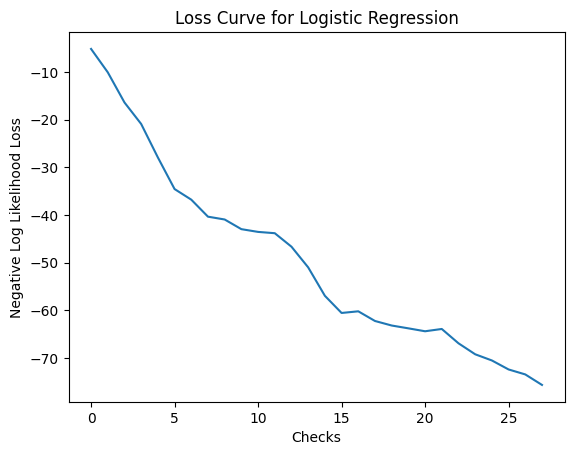

In [213]:
# Using the logistic regressor on the blobs dataset
blob_model=LogisticRegressor()
blob_model.fit(blobs_X_train.values,blobs_y_train.values,max_iters=9000e1000,alpha=1e-3,N=10,threshold=1e-22,seed=2380453533)
print("Validation F1 Score: ",blob_model.score([1 if x>0.6 else 0  for x in blob_model.predict(blobs_X_val)],blobs_y_val))
blob_preds=blob_model.predict(blobs_X_test)
blob_preds_upd=[1 if x>0.6 else 0  for x in blob_preds]
print("Test Data F1 Score: ",blob_model.score(blob_preds_upd,blobs_y_test))

Validation F1 Score: 

 0.7070707070707071
Test Data F1 Score:  0.6363636363636364


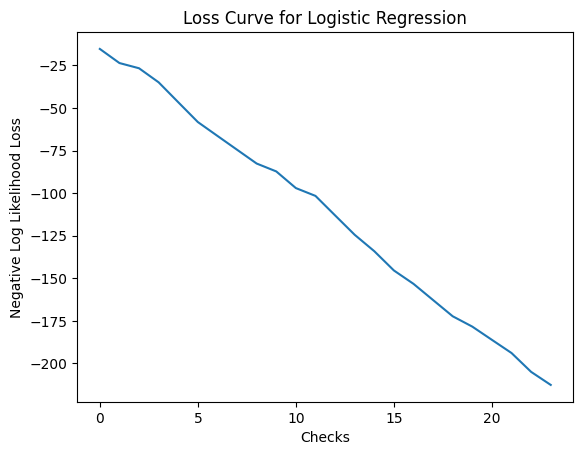

In [214]:
## Using the logistic regressor on the circles dataset
circles_model=LogisticRegressor()
circles_model.fit(circles_X_train.values,circles_y_train.values,max_iters=900000e800,alpha=1e-3,threshold=1e-30,seed=2051109441)
print("Validation F1 Score: ",circles_model.score([1 if x>0.5 else 0  for x in circles_model.predict(circles_X_val)],circles_y_val))
circles_preds=circles_model.predict(circles_X_test)
circles_preds_upd=[1 if x>0.5 else 0  for x in circles_preds]
print("Test Data F1 Score: ",circles_model.score(circles_preds_upd,circles_y_test))

### Observations
It was observed that the model performs better for the blobs dataset than the circles dataset. This is due to the non linearlity attached to the circles dataset, and logistic regression works well for linearly separable data. Everytime the model is run it may or may not have the best weight for the case. <br>
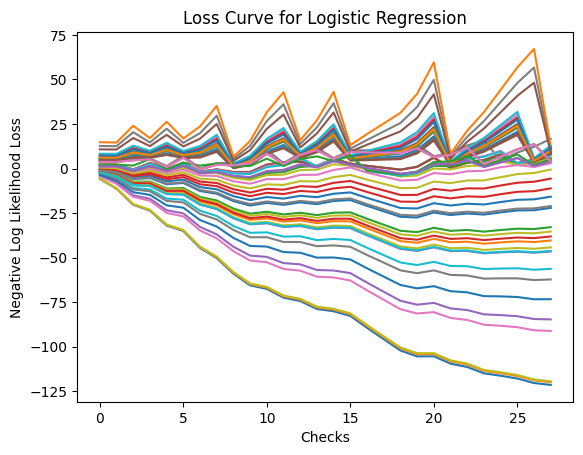

## Part-3

## Shallow Neural Network (1 hidden layer)
For the shallow neural network there is one hidden layer which has a list of nodes, and an output node.<br>
Each node has two aspects associated to it which is the weight and the bias. We can represent a layer by instantiating the Node class in a list.
The differential of sigmoid is written as a function. $$d/dz(\sigma(z))=\sigma(z)*(1-\sigma(z))$$
The training and validation have two steps associated to it.
- Forward propagation
- Backward propagation

In the forward propagation the values of the input data are passed into the hidden nodes of the model. The weights are initialised with values that belong to the normal distribution. For each node there is a functionality to perform the forward and the backward pass. The backward pass for a node is determined by the present node weights and the forward pass value for that particular node, and the output error on the last node (single node on the ouptut).

The training happens similar to how it is done in the Logistic regression code.In the end the model plots the loss curve across the steps. The benefit of Shallow Neural Network is that it can accomodate more complexity in hypothesis functions.  

### References
CT5133 - Topic 3: Fundamentals of Neural Networks, Part 2 Slide: 10-19


In [5]:
#Defining the differential of sigmoid function
def d_sigmoid_dz(z):
    return sigmoid(z)*(1-sigmoid(z))

#Creating Node class to represent the node
class Node:
    def __init__(self,size):
        self.w_mat=np.random.randn(size)
        self.b_mat=np.random.randn()

    def fwd_pass(self,X):
        return sigmoid(np.matmul(self.w_mat,X)+self.b_mat)
    def bwd_pass(self,X,error,alpha):
        self.w_mat-=alpha*error*d_sigmoid_dz(self.fwd_pass(X))*X
        self.b_mat-=alpha*error*d_sigmoid_dz(self.fwd_pass(X))
        return self.w_mat*error*d_sigmoid_dz(self.fwd_pass(X))

#Creating the shallow neural network for classification 
class ShallowNNforClassification:
    def __init__(self,size,n_hidden):
        self.hidden_layer=[Node(size) for _ in range(n_hidden)]
        self.output_node=Node(n_hidden)
    
    def fit(self,X,y,alpha=1e-3,max_iters=100e3,threshold=1e-10,N=15):
        stop,J_present,J_previous,iteration=False,0,0,0 
        J_tag=[]
        while not stop:
            check=0
            for i in range(len(X)):
                train_X,train_y=X[i],y[i]
                hidden_ouputs=[node.fwd_pass(train_X) for node in self.hidden_layer]
                y_hat=self.output_node.fwd_pass(np.array(hidden_ouputs))
                #Backward Propagation steps for the nodes
                output_layer_error=y_hat-train_y
                hidden_layer_error=np.sum([node.bwd_pass(train_X,output_layer_error*self.output_node.w_mat[j],alpha)
                                           for j,node in enumerate(self.hidden_layer)],axis=0)
                self.output_node.w_mat-=alpha*output_layer_error*np.array(hidden_ouputs)
                self.output_node.b_mat-=alpha*output_layer_error
                # Updating the weights based on the differential values calculated for the weights and biases
                for k,node in enumerate(self.hidden_layer):
                    node.w_mat-=alpha*hidden_layer_error[k]*train_X
                    node.b_mat-=alpha*hidden_layer_error[k]
                iteration+=1
                J_present+=log_likelihood_loss(train_y,y_hat)
                if iteration>max_iters:
                    stop=True
                    print("Not converged",J_present-J_previous)
                if iteration%N==0:
                    check+=1
                    J_tag.append(J_present)
                    if J_present-J_previous<threshold:
                        stop=True
                        #print("Converged at Check: ",check," iteration: ",iteration)                       
                    else:
                        J_previous=J_present
                        J_present=0
        # Plotting the Loss curve
        plt.title('Loss Curve for Shallow Neural Network')
        plt.xlabel('Checks')
        plt.ylabel('Negative Log Likelihood Loss')
        plt.plot(J_tag)
        #print('Losses:',J_tag)
        return self
    def predict(self,X_t):
        predictions=[]
        for i in range(len(X_t)):
            hidden_outputs=[node.fwd_pass(X_t[i]) for node in self.hidden_layer]
            pred=self.output_node.fwd_pass(np.array(hidden_outputs))
            predictions.append(pred)
        return predictions
    
    def score(self,y_pred,y_true):
        return metrics.f1_score(y_true,y_pred)         


The model is fitted on the train, validation, and the testing data of Blobs and Circles Dataset.

Validation F1 Score:  0.9600000000000001
Test Data F1 Score:  0.9841269841269841


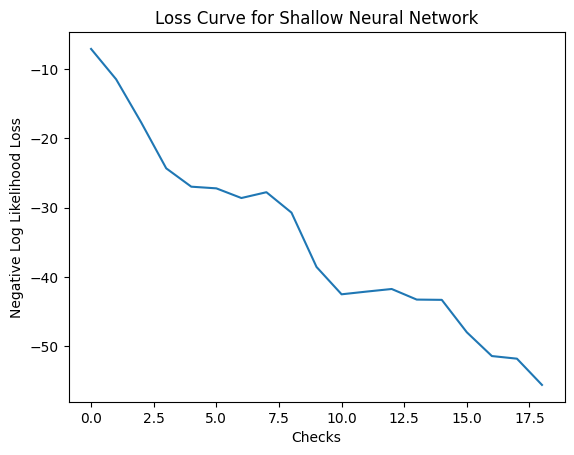

In [804]:
# Using the Shallow Neural Network on the blobs dataset
blob_model_nn=ShallowNNforClassification(blobs_X_train.shape[1],2)
blob_model_nn.fit(blobs_X_train.values,blobs_y_train.values,alpha=1e-2,max_iters=1000000e1000000,threshold=1e-28,N=15)
print("Validation F1 Score: ",blob_model_nn.score([1 if x>0.5 else 0  for x in blob_model_nn.predict(blobs_X_val.values)],blobs_y_val))
blob_preds=blob_model_nn.predict(blobs_X_test.values)
blob_preds_upd=[1 if x>0.5 else 0  for x in blob_preds]
print("Test Data F1 Score: ",blob_model_nn.score(blobs_y_test,blob_preds_upd))

Validation F1 Score:  0.7608695652173912
Test Data F1 Score:  0.6796116504854368


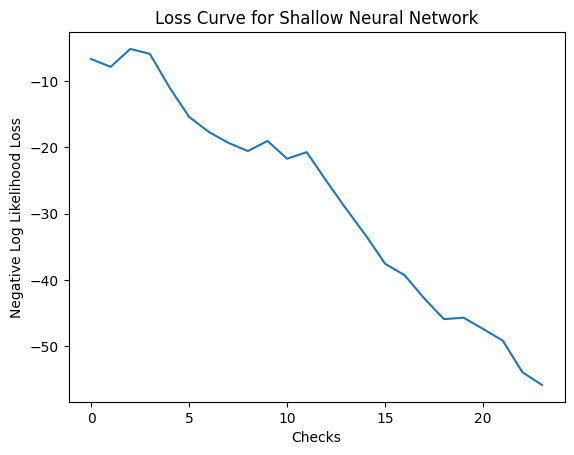

In [1020]:
# Using the Shallow Neural Network on the circles dataset
circle_model_snn=ShallowNNforClassification(circles_X_train.shape[1],2)
circle_model_snn.fit(circles_X_train.values,circles_y_train.values,alpha=1e-5,max_iters=50000000e1000000,threshold=1e-80)
print("Validation F1 Score: ",circle_model_snn.score([1 if x>0.5 else 0  for x in circle_model_snn.predict(circles_X_val.values)],circles_y_val))
circles_preds=circle_model_snn.predict(circles_X_test.values)
circles_preds_upd=[1 if x>0.5 else 0  for x in circles_preds]
print("Test Data F1 Score: ",circle_model_snn.score(circles_y_test,circles_preds_upd))

### Observations
It was observed that the model performs relatively better for the blobs dataset than the circles dataset. There has been a certain level of increase in the performance for both the datasets as the additional layer introduced was able to model the non linearities. The np.random.randn was found to be performing better than np.random.normal function hence was used to initialize the weights. One major issue faced was that it is not a good idea to set the seed here as the weights need to be random and small and not same.

## Part 4

### Loading Fashion MNIST Data 
The dataset is from github where the training, and testing (10k data points) datasets are present. The code snippet takes in the zip files and then filters the image data, and labels based on the selected binary labels in list.  

### References 
Load-Fashion-MNIST.py provided in the Assignment Section CT5133 2324

In [6]:
# Function defined to load the MNIST data and the returned data consists of classes which are defined
def load_mnist_data(path,segment='train',selected_labels=None):
    labels_path=os.path.join(path,f"{segment}-labels-idx1-ubyte.gz")
    images_path=os.path.join(path,f"{segment}-images-idx3-ubyte.gz")

    with gzip.open(labels_path,'rb') as lbpath:
        labels=np.frombuffer(lbpath.read(),dtype=np.uint8,offset=8)

    with gzip.open(images_path,'rb') as imgpath:
        images=np.frombuffer(imgpath.read(),dtype=np.uint8,offset=16).reshape(len(labels),784)
    # Performs the filtration process based on the labels provided 
    if selected_labels is not None:
        selector=np.isin(labels,selected_labels)
        images=images[selector]
        labels=labels[selector]
    labels=[lab-6 for lab in labels ] # Converting labels to 0 and 1
    return images,labels
# loading the images and labels for Sneakers, and Shirt
(temp_imgs,temp_labels)=load_mnist_data('mnist-dataset','train',[6,7])
(test_imgs,test_labels)=load_mnist_data('mnist-dataset','t10k',[6,7])
train_imgs,val_imgs,train_labels,val_labels=model_selection.train_test_split(temp_imgs,temp_labels,test_size=0.1)


Validation F1 Score:  0.9080675422138836
Test Data F1 Score:  0.904709748083242


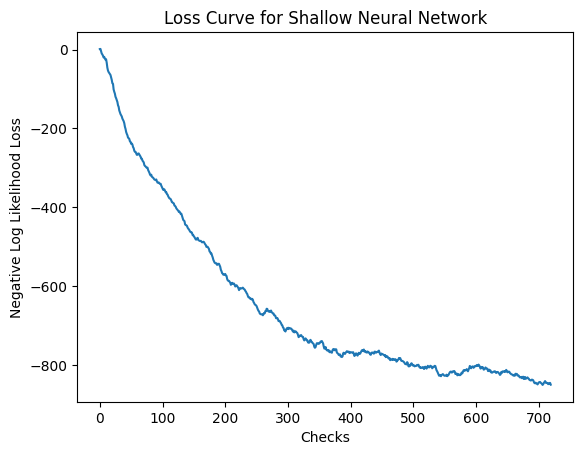

In [1024]:
# Applying the Shallow Neural Network on the Fashion MNIST Dataset
mnist_nn=ShallowNNforClassification(train_imgs.shape[1],2)
mnist_nn.fit(train_imgs,train_labels,alpha=1e-4,max_iters=1000000e100000000,threshold=1e-42)
print("Validation F1 Score: ",mnist_nn.score([1 if x>0.5 else 0  for x in mnist_nn.predict(val_imgs)],val_labels))
mnist_preds=mnist_nn.predict(test_imgs)
mnist_preds=[1 if x>0.5 else 0  for x in mnist_preds]
print("Test Data F1 Score: ",mnist_nn.score(test_labels,mnist_preds))

### Observations
The shallow network is able to predict the classes of the data howevr, the issue persists that based on the weight initialization the score drastically differs.Irrespective of changing the max_iters and alpha values there is no flattening occuring in the training stage. <br>
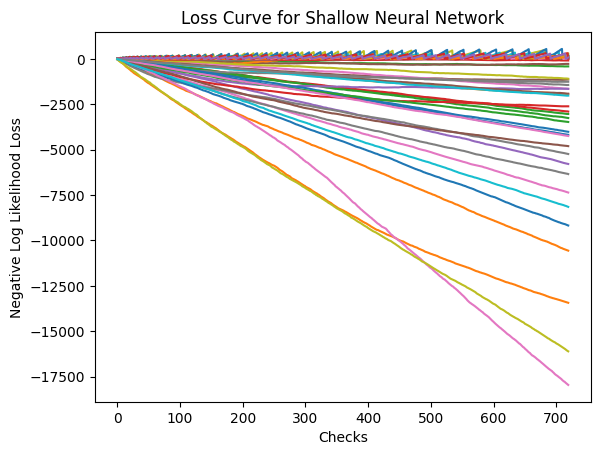

## Part 5

### Deep Neural Network with enhancements
The data considered was normalized by dividing 255 to each pixel values. In general neural networks perform better with smaller values and using smaller values can avoid the issue of saturating the outputs. <br>
<b><u>As an enhancement an additional hidden layer is added to the model. Along with that the activation function in the hidden layers are kept as leaky relu, and the activation for the output node is sigmoid function which will yield the probablity.</b></u> The training occurs where there are chained backpropagation process. This is an extension from the case of shallow neural network, and the method to calculate the error remains the same for all the hidden layers. The additional backpropagation occurs to train all the hidden layers. The added benfit is that more hidden layers can model very complex hypothesis. Since the data is of a huge size it is not possible to model all the data points with the presence of limited size neural network.  
Leaky ReLU was considered due to the disadvantage of vanishing gradients in the regular ReLU activation function. ReLU has proven to be efficent to help in faster training and simplification of calculation which is a bonus in the case of very deep networks.

In [7]:
#Defiing the leaky relu activation for the hidden layers
def leaky_relu(z,alpha=0.01):
    return np.maximum(alpha*z,z)
def d_relu_dz(z,alpha=0.01):
    return np.where(z>=0,1,alpha)
    
#Creating Node class to represent the node
class Node_in:
    def __init__(self,size):
        self.w_mat=np.random.randn(size)
        self.b_mat=np.random.randn()
    def fwd_pass(self,X):
        return leaky_relu(np.matmul(self.w_mat,X)+self.b_mat)
    def bwd_pass(self,X,error,alpha):
        self.w_mat-=alpha*error*d_relu_dz(self.fwd_pass(X))*X
        self.b_mat-=alpha*error*d_relu_dz(self.fwd_pass(X))
        return self.w_mat*error*d_relu_dz(self.fwd_pass(X))




# Defining a class to define the Deep Neural Network which is an extension of Shallow Neural Network with an additional layer
class DeepNNforClassification:
    def __init__(self,size,n_hidden1,n_hidden2):
        self.hidden_layer1=[Node_in(size) for _ in range(n_hidden1)]
        self.hidden_layer2=[Node_in(size) for _ in range(n_hidden2)]
        self.output_node=Node(n_hidden2)
    
    def fit(self,X,y,alpha=1e-3,max_iters=100e3,threshold=1e-10,N=15):
        # Setting the hyperparamaeters
        stop,J_present,J_previous,iteration=False,0,0,0 
        J_tag=[]
        # Loop defined to make updations in parameters and achieve convergence
        while not stop:
            epoch=0
            for i in range(len(X)):
                train_X,train_y=X[i],y[i]
                hidden_ouputs1=[node.fwd_pass(train_X) for node in self.hidden_layer1]
                hidden_ouputs2=[node.fwd_pass(np.array(hidden_ouputs1)) for node in self.hidden_layer2]
                y_hat=self.output_node.fwd_pass(np.array(hidden_ouputs2))
                #Backward Propagation
                output_layer_error=y_hat-train_y
                #Propogating the errors to previous layers
                hidden_layer_error2=np.sum([node.bwd_pass(np.array(hidden_ouputs1),output_layer_error*self.output_node.w_mat[j],alpha)
                                           for j,node in enumerate(self.hidden_layer2)],axis=0)
                hidden_layer_error1=np.sum([node.bwd_pass(np.array(train_X),hidden_layer_error2[k],alpha)
                                           for k,node in enumerate(self.hidden_layer1)],axis=0)
                self.output_node.w_mat-=alpha*output_layer_error*np.array(hidden_ouputs2)
                self.output_node.b_mat-=alpha*output_layer_error

                for k,node in enumerate(self.hidden_layer1):
                    node.w_mat-=alpha*hidden_layer_error1[k]*train_X
                    node.b_mat-=alpha*hidden_layer_error1[k]
                for j, node in enumerate(self.hidden_layer2):
                    node.w_mat-=alpha*hidden_layer_error2[j]*np.array(hidden_ouputs1)
                    node.b_mat-=alpha*hidden_layer_error2[j]
                iteration+=1
                J_present+=log_likelihood_loss(train_y,y_hat)
                # Stopping condition
                if iteration>max_iters:
                    stop=True
                    #print("Not converged",J_present-J_previous)
                if iteration%N==0:
                    epoch+=1
                    J_tag.append(J_present)
                    if J_present-J_previous<threshold:
                        stop=True
                        #print("Converged at Epoch: ",epoch," iteration: ",iteration)
                    else:
                        J_previous=J_present
                        J_present=0
        #Plotting the learning curve
        plt.title('Loss Curve for Deep Neural Network')
        plt.xlabel('Checks')
        plt.ylabel('Negative Log Likelihood Loss')
        plt.plot(J_tag)
        #print('Losses:',J_tag)
        return self
    def predict(self,X_t):
        predictions=[]
        for i in range(len(X_t)):
            hidden_ouputs1=[node.fwd_pass(X_t[i]) for node in self.hidden_layer1]
            hidden_ouputs2=[node.fwd_pass(np.array(hidden_ouputs1)) for node in self.hidden_layer2]
            pred=self.output_node.fwd_pass(np.array(hidden_ouputs2))
            predictions.append(pred)
        return predictions
    
    def score(self,y_pred,y_true):
        return metrics.f1_score(y_true,y_pred)

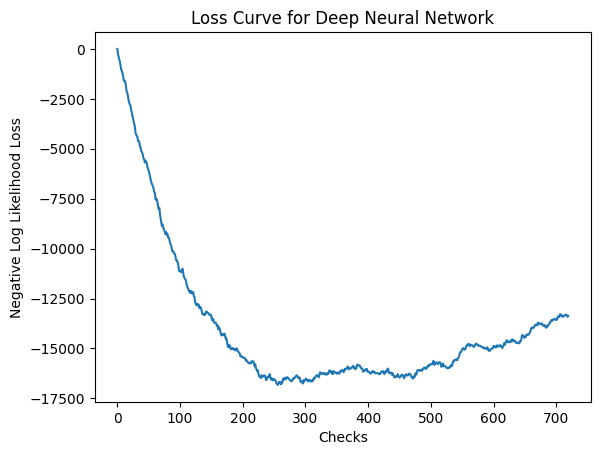

In [8]:
# Applying Deep Neural Network on the Fashion MNIST dataset
mnist_dnn=DeepNNforClassification(train_imgs.shape[1],train_imgs.shape[1],train_imgs.shape[1])
mnist_dnn.fit(train_imgs/255.0,train_labels,alpha=1e-7,max_iters=1000000000e1000000000,threshold=1e-100);

In [9]:
#train_imgs,val_imgs,train_labels,val_labels=model_selection.train_test_split(temp_imgs,temp_labels,test_size=0.1)
# Performing evaluations on the validation and test set of Fashion MNIST dataset
print("Validation F1 Score: ",mnist_dnn.score([1 if x>0.5 else 0  for x in mnist_dnn.predict(val_imgs/255.0)],val_labels))
mnist_preds=mnist_dnn.predict(test_imgs/255.0)
mnist_preds=[1 if x>0.5 else 0  for x in mnist_preds]
print("Test Data F1 Score: ",mnist_dnn.score(test_labels,mnist_preds))

Validation F1 Score:  0.8353765323992994
Test Data F1 Score:  0.8271290158082613


### Observations
It was observed that the model takes too long to train with only sigmoid function considering it needs to take input which has 784 values and then pass to the next layers to process the data. The goal of using a Deep Neural network is to make sure we can leverage its ability to model any kind of hypothesis function. The training process was shortened by a great extent when ReLU was used in the layers.